# Create a mesh with labeled boundaries for ElmerIce

This module makes 2D meshes of different resolutions for ElmerIce, with customised labeled boundaries.  ElmerIce will extrude the mesh into 3D.


### Required python modules:

* meshio
* pygmsh
* shapely
* geopandas 
* fiona 
* matplotlib
* numpy
* os


## Process:

**Making a mesh**
1. Load mesh maker package
2. Load glacier perimeter file
3. Make 1D perimeters with different resolutions (grid spacing)
4. (optional) Export the new resolution perimeters.
5. Make 2D meshes for all set resolutions
6. Use ElmerGrid to make the meshes suitable for Elmer

**Labeling the boundaries**

1. Set the glacier corners
2. Label the glacier boundaries for ElmerIce to read

------------------------------------------------------------------


# Making a mesh

## 1. Load mesh maker package

In [1]:
import os
import sys

#location of elmer_mesh_maker package
package_location = 'elmer_mesh_maker'
sys.path.append(os.getcwd())

import elmer_mesh_maker as el

## 2. Load input glacier perimeter

   begin  end                                           geometry
0      1    1  LINESTRING (1314342 5112849.2, 1314323.3675516...


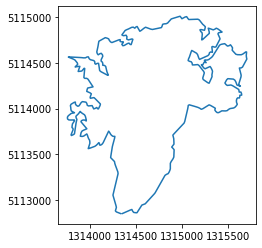

In [2]:
#create mesh object
msh = el.mesh() 

#change directory to a folder to read perimeter file from and write meshes to
folder = '/example_perimeter' 
os.chdir(os.getcwd()+folder)

perimeter_file = 'brewster.shp'

msh.load_perimeter(perimeter_file)

## 3. Make perimeters with different resolutions (grid spacing)
The mesh maker gmsh works by taking a 1D perimeter and extrapolating a 2D mesh. The point spacing in the perimeter will determine the point spacing of the mesh.

First set resolutions, then make the perimeters

Plotted with points 50 apart


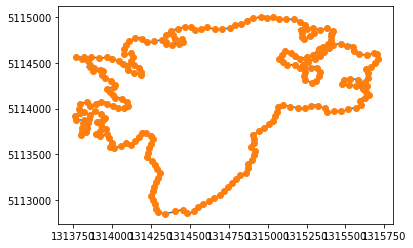

In [5]:
msh.set_resolutions([50,100,200,300]) #units are the same as input perimeter coordinates

msh.make_perimeters_newres()

#put the index of the resolution you wish to plot
msh.plot(0)

Plotted with points 300 apart


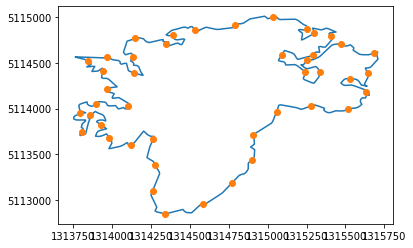

In [6]:
msh.plot(3)

## 4. (optional) Export the new resolution perimeters.

In [7]:
msh.export()

exported brewster_50.shp to /Users/home/whitefar/PROJECTS/KAMB_ELMER_GLADS/elmer_mesh_maker/example_perimeter
exported brewster_100.shp to /Users/home/whitefar/PROJECTS/KAMB_ELMER_GLADS/elmer_mesh_maker/example_perimeter
exported brewster_200.shp to /Users/home/whitefar/PROJECTS/KAMB_ELMER_GLADS/elmer_mesh_maker/example_perimeter
exported brewster_300.shp to /Users/home/whitefar/PROJECTS/KAMB_ELMER_GLADS/elmer_mesh_maker/example_perimeter


## 5. Make meshes for all set resolutions

make_meshes() uses pygmsh and meshio which use gmsh to make the meshes in a gmsh .msh format. 

.geo and .vtu formats are also saved. .vtu can be viewed in the software paraview

In [8]:
msh.make_meshes()


geo file: brewster_50.geo
brewster written as brewster_50.geo and brewster_50.msh and brewster_50.vtu

geo file: brewster_100.geo
brewster written as brewster_100.geo and brewster_100.msh and brewster_100.vtu

geo file: brewster_200.geo
brewster written as brewster_200.geo and brewster_200.msh and brewster_200.vtu

geo file: brewster_300.geo
brewster written as brewster_300.geo and brewster_300.msh and brewster_300.vtu


## 6. Use ElmerGrid to make the meshes suitable for Elmer

Use the following cell to make a command you can copy and paste into the bash shell to run ElmerGrid over the meshes. 

ElmerGrid to modifys the mesh to an Elmer format. More info [here](http://www.elmerfem.org/blog/preprocess/mesh-generation-software-used-with-elmer/)

Alternatively put ```msh.print_elmergrid_command('script') ``` to print a bash script to file which will run the same command.

In [9]:
msh.print_elmergrid_command()        

 
 
 
 
Printing a command to run in bash shell. This command processes all mesh files with ElmerGrid.
 
The command is below:
 
 
 
 
cd /Users/home/whitefar/PROJECTS/KAMB_ELMER_GLADS/elmer_mesh_maker/example_perimeter
ElmerGrid 14 2 brewster_50 -autoclean
ElmerGrid 14 2 brewster_100 -autoclean
ElmerGrid 14 2 brewster_200 -autoclean
ElmerGrid 14 2 brewster_300 -autoclean
 
 
 
 


List all the mesh names. The Elmer-ready meshes show up as a folder with mesh.boundary mesh.header mesh.node and mesh.elements files.

In [10]:
msh.output_filenames

['brewster_50', 'brewster_100', 'brewster_200', 'brewster_300']

# Labeling the mesh boundaries

To use ElmerIce, the mesh must have labeled boundaries. ElmerGrid automatically labels the boundaries, but you may want them in separate places.

## 1. Set coordinates for the corners
'Corners' are points which separate the desired boundaries.

corners that divide boundaries are set as the red dots.


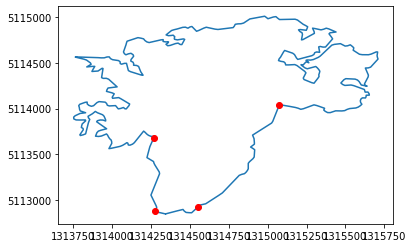

In [11]:
msh.set_corners([(1314274.9987104018, 5112882.022700516),
 (1314266.9226336845, 5113679.104938047),
 (1315070.9465903954, 5114035.080386854),
 (1314553.726167038, 5112929.071662091)])

### OR
If you cant be arsed opening a map to find the coordinates, use the following command to find the corner coordinates by guessing and checking the corner point indicies

Perimeter has 695 points.
Red dot is at (1314274.9987104018, 5112882.022700516). Green at (1314266.9226336845, 5113679.104938047). Orange at (1315070.9465903954, 5114035.080386854). Blue at (1314553.726167038, 5112929.071662091).
corners that divide boundaries are set as the red dots.


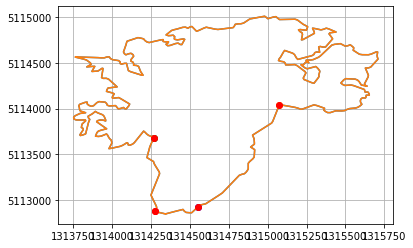

In [12]:
msh.find_corners([4,46,614,680])
msh.found_corners
msh.set_corners()

## 2. Label the glacier boundaries for ElmerIce to read
Input a list of integers

mesh.boundary overwritten with new boundary labels for grid spacing of 50
mesh.boundary overwritten with new boundary labels for grid spacing of 100
mesh.boundary overwritten with new boundary labels for grid spacing of 200
mesh.boundary overwritten with new boundary labels for grid spacing of 300


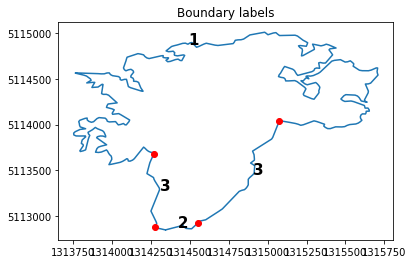

In [15]:
msh.label_boundaries([2,3,1,3])

Here, I wanted the walls to both be 3, the glacier head one, and the terminus 2.

Plot the boundaries to check that corners and labels are in the right place for different resolutions.

Red dots separate green labeled boundaries


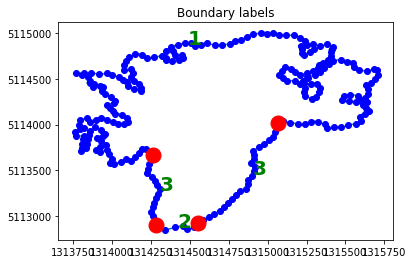

In [16]:
msh.plot_boundaries(0)

Red dots separate green labeled boundaries


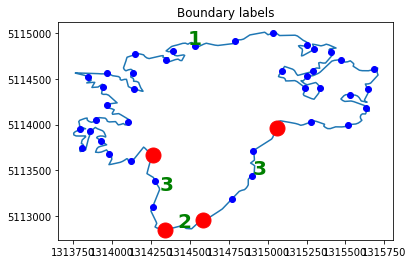

In [17]:
msh.plot_boundaries(3)

# END
The mesh is ready for elmer

To visualise the mesh, open ElmerGUI and load the mesh folder. Select View -> Numbering -> Boundary Index to check the boundary labeling is right

### Other useful commands:

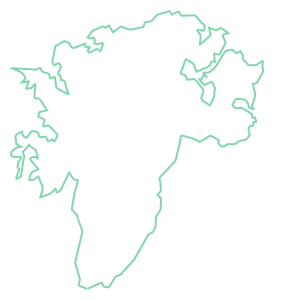

In [18]:
msh.perimeter #the shapely linestring of input perimeter

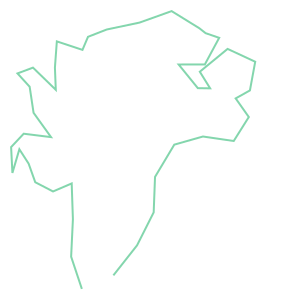

In [19]:
msh.perimeters_newres  # a list of the shapely linestrings of set resolution perimeters eg:
msh.perimeters_newres[3]

In [20]:
msh.found_corners #the coordinates of corners found with find_corners()

[(1314274.9987104018, 5112882.022700516),
 (1314266.9226336845, 5113679.104938047),
 (1315070.9465903954, 5114035.080386854),
 (1314553.726167038, 5112929.071662091)]